<font size="7"><span style="color: #33D6CC;">Exploración variables categóricas</span></font>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
df = pd.read_csv('tenis_bruto.csv')
df

C:\Users\albam\AppData\Local\Temp\ipykernel_24704\584941035.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tenis_bruto.csv')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193332,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4.0,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
193333,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
193334,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
193335,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


In [4]:
    # Quitar filas correspondientes a minutes nulos
df.dropna(subset='minutes',inplace=True)
df.shape

(93682, 49)

In [5]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [6]:
    # división en numéricas
df_num = df._get_numeric_data()

In [7]:
df_num.columns

Index(['draw_size', 'tourney_date', 'match_num', 'winner_id', 'winner_ht',
       'winner_age', 'loser_id', 'loser_ht', 'loser_age', 'best_of', 'minutes',
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [8]:
    # División en categóricas
df_cat = df.drop(columns=df_num.columns)
df_cat

,tourney_id,tourney_name,surface,tourney_level,winner_seed,winner_entry,winner_name,winner_hand,winner_ioc,loser_seed,loser_entry,loser_name,loser_hand,loser_ioc,score,round
17897,1972-7308,Adelaide,Grass,A,NaN,NaN,Kim Warwick,R,AUS,NaN,NaN,Barry Phillips Moore,R,AUS,7-6 6-7 11-9,R32
26849,1975-2023,Fairfield,Carpet,A,NaN,NaN,Ion Tiriac,R,ROU,NaN,NaN,Abbie Maynard,U,USA,6-0 6-0,R32
26865,1975-2023,Fairfield,Carpet,A,NaN,NaN,Roger Taylor,L,GBR,NaN,NaN,Sandy Mayer,R,USA,7-5 5-7 7-6(1),F
73970,1987-414,Hamburg,Clay,A,1.0,NaN,Ivan Lendl,R,USA,2.0,NaN,Miloslav Mecir,R,SVK,6-1 6-3 6-3,F
86621,1991-339,Adelaide,Hard,A,NaN,NaN,Magnus Larsson,R,SWE,1.0,NaN,Boris Becker,R,GER,6-4 3-6 7-6(2),R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193332,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,D,NaN,NaN,Joaquin Aguilar Cardozo,U,URU,NaN,NaN,Ilya Snitari,U,MDA,6-1 6-0,RR
193333,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,D,NaN,NaN,Nam Hoang Ly,R,VIE,NaN,NaN,Philip Henning,R,RSA,6-3 6-4,RR
193334,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,D,NaN,NaN,Kris Van Wyk,U,RSA,NaN,NaN,Linh Giang Trinh,R,VIE,4-6 6-3 4-0,RR
193335,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,D,NaN,NaN,Nam Hoang Ly,R,VIE,NaN,NaN,Kris Van Wyk,U,RSA,6-4 3-6 6-3,RR


In [47]:
df_cat.columns

Index(['tourney_id', 'tourney_name', 'surface', 'tourney_level', 'winner_seed',
       'winner_entry', 'winner_name', 'winner_hand', 'winner_ioc',
       'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ioc',
       'score', 'round'],
      dtype='object')

**Comentario:** Las variables relacionadas con entry y seed eliminar. 

In [48]:
    # eliminar variables sin interes en su analisis
df_cat.drop(columns= ['tourney_id','winner_seed','winner_entry','loser_seed','loser_entry'],inplace = True)
df_cat

,tourney_name,surface,tourney_level,winner_name,winner_hand,winner_ioc,loser_name,loser_hand,loser_ioc,score,round
17897,Adelaide,Grass,A,Kim Warwick,R,AUS,Barry Phillips Moore,R,AUS,7-6 6-7 11-9,R32
26849,Fairfield,Carpet,A,Ion Tiriac,R,ROU,Abbie Maynard,U,USA,6-0 6-0,R32
26865,Fairfield,Carpet,A,Roger Taylor,L,GBR,Sandy Mayer,R,USA,7-5 5-7 7-6(1),F
73970,Hamburg,Clay,A,Ivan Lendl,R,USA,Miloslav Mecir,R,SVK,6-1 6-3 6-3,F
86621,Adelaide,Hard,A,Magnus Larsson,R,SWE,Boris Becker,R,GER,6-4 3-6 7-6(2),R32
...,...,...,...,...,...,...,...,...,...,...,...
193332,Davis Cup WG2 PO: URU vs MDA,Clay,D,Joaquin Aguilar Cardozo,U,URU,Ilya Snitari,U,MDA,6-1 6-0,RR
193333,Davis Cup WG2 PO: VIE vs RSA,Hard,D,Nam Hoang Ly,R,VIE,Philip Henning,R,RSA,6-3 6-4,RR
193334,Davis Cup WG2 PO: VIE vs RSA,Hard,D,Kris Van Wyk,U,RSA,Linh Giang Trinh,R,VIE,4-6 6-3 4-0,RR
193335,Davis Cup WG2 PO: VIE vs RSA,Hard,D,Nam Hoang Ly,R,VIE,Kris Van Wyk,U,RSA,6-4 3-6 6-3,RR


In [49]:
df_cat.columns

Index(['tourney_name', 'surface', 'tourney_level', 'winner_name',
       'winner_hand', 'winner_ioc', 'loser_name', 'loser_hand', 'loser_ioc',
       'score', 'round'],
      dtype='object')

In [50]:
df_cat.isnull().sum()

tourney_name      0
surface           0
tourney_level     0
winner_name       0
winner_hand       3
winner_ioc        0
loser_name        0
loser_hand       24
loser_ioc         0
score             0
round             0
dtype: int64

In [51]:
df_cat.surface.unique()

array(['Grass', 'Carpet', 'Clay', 'Hard'], dtype=object)

In [52]:
df[df['surface']=='Carpet'][['surface','tourney_date']]

,surface,tourney_date
26849,Carpet,19750224
26865,Carpet,19750224
86982,Carpet,19910204
86983,Carpet,19910204
86984,Carpet,19910204
...,...,...
173522,Carpet,20170203
173535,Carpet,20170203
173536,Carpet,20170203
173537,Carpet,20170203


**Comentario**:Las pistas carpet fueron cambiadas en 2009 a duras  

In [53]:
df_cat.tourney_level.unique()

array(['A', 'G', 'M', 'F', 'D'], dtype=object)

In [56]:
    #añadir variable sets para analizar score
    #variable sets por partido
sets=[]
for i in df.score:
     sets.append(len(i.split()))
   
df['sets']=sets
df.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,sets
17897,1972-7308,Adelaide,Grass,64.0,A,19720117,270,100273,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
26849,1975-2023,Fairfield,Carpet,32.0,A,19750224,13,100035,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,2
26865,1975-2023,Fairfield,Carpet,32.0,A,19750224,29,100058,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.0,NaN,55.0,NaN,3


In [61]:
df[df['sets']==1][['score','best_of']]

,score,best_of
87553,W/O,3
145037,RET,5
171992,W/O,5
182077,W/O,5
182183,W/O,3
182198,W/O,3
182276,W/O,3
183080,W/O,3
183261,W/O,3
183365,W/O,3


In [64]:
df[(df['sets']==1) & (df['best_of']==5)][['score','best_of']]

,score,best_of
145037,RET,5
171992,W/O,5
182077,W/O,5
185208,W/O,5
186269,W/O,5


In [65]:
df[(df['sets']==2) & (df['best_of']==5)][['score','best_of']]

,score,best_of
86775,7-6(6) RET,5
93272,6-1 RET,5
99864,6-3 RET,5
100205,3-2 RET,5
104051,7-6(6) RET,5
...,...,...
175499,6-2 RET,5
181149,6-2 RET,5
182627,6-5 DEF,5
187631,3-1 RET,5


In [66]:
df_cat['round'].unique()

array(['R32', 'F', 'R16', 'QF', 'SF', 'R128', 'R64', 'RR', 'ER', 'BR'],
      dtype=object)

In [72]:
df_cat.columns

Index(['tourney_name', 'surface', 'tourney_level', 'winner_name',
       'winner_hand', 'winner_ioc', 'loser_name', 'loser_hand', 'loser_ioc',
       'score', 'round', 'sets'],
      dtype='object')

## Análisis Bivariado

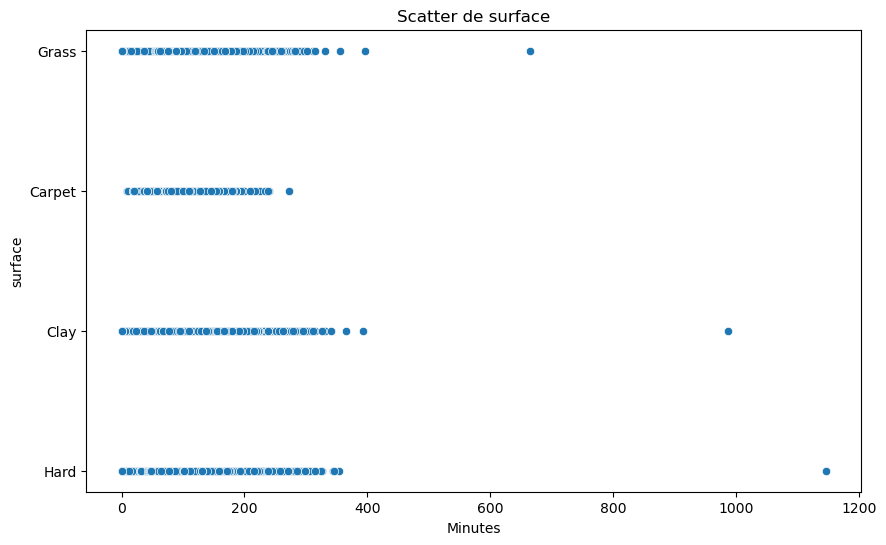

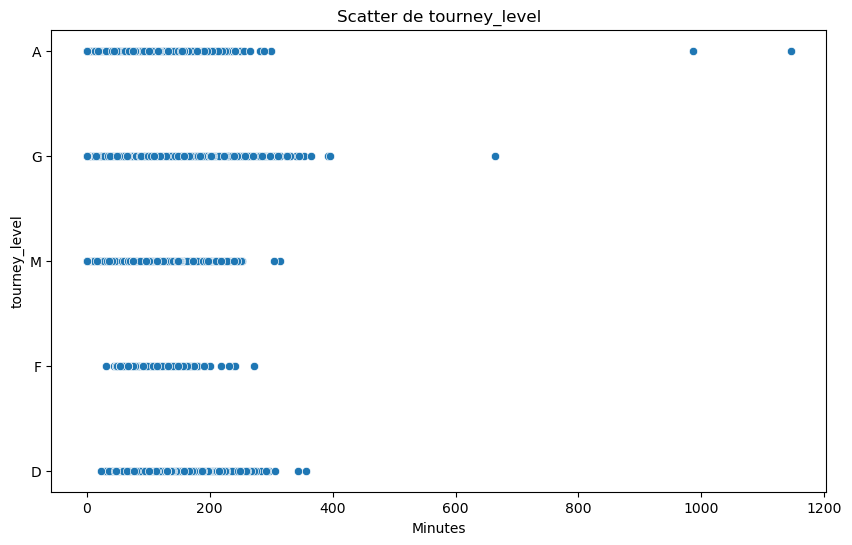

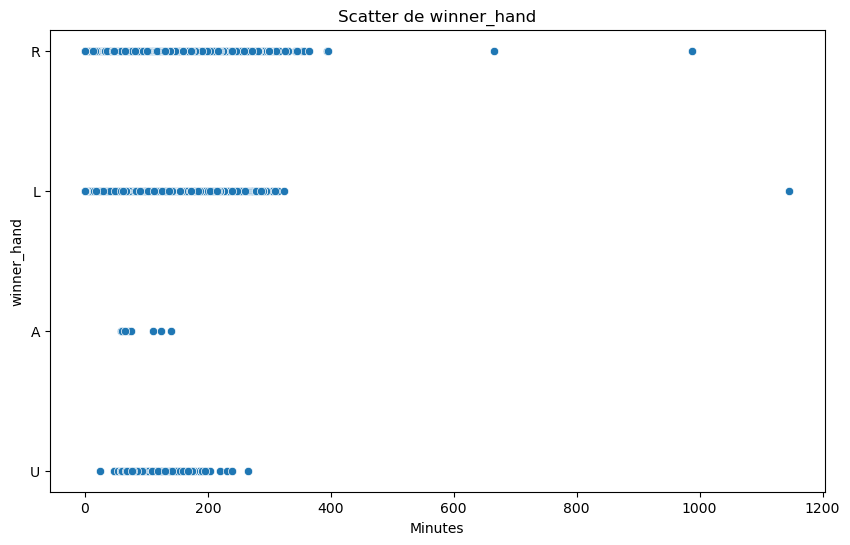

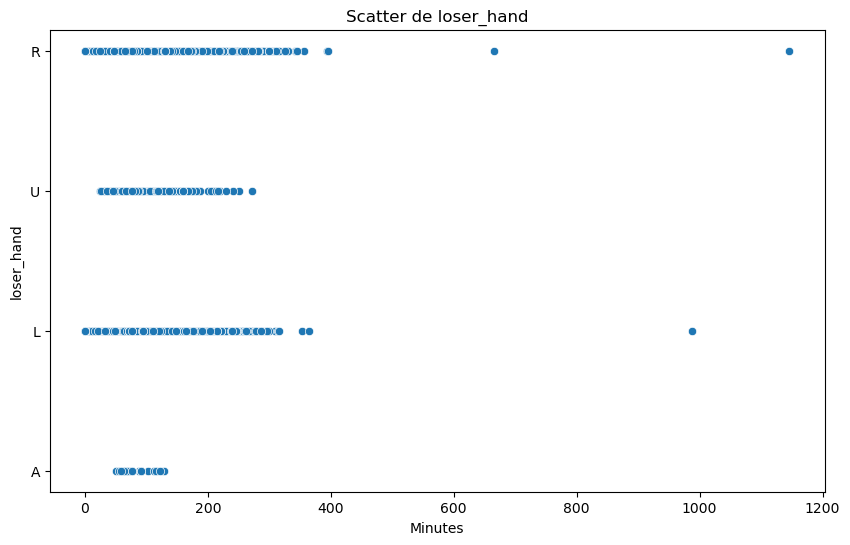

In [74]:
    # Análisis Bivariado categóricas
columnas = df_cat[['surface', 'tourney_level','winner_hand','loser_hand']]
for variable in columnas:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data = df, y=df_cat[variable],x=df['minutes'])
        plt.title(f'Scatter de {variable}')
        plt.xlabel('Minutes')
        plt.ylabel(variable)
        plt.show()

**Comentario:**